# M3. 데이터 처리와 가공
- 파이썬 프로그래밍 기본문법 - 자료유형별 처리
- 데이터 집계, 정렬
- 데이터프레임(테이블) 집계 - 정렬, 추출, 병합, 데이터 정제
<br><br>
- **목표** : 다양한 데이터를 원하는 형태로 가공하는 방법 이해


In [1]:
# 기본적으로 필요한 라이브러리 로딩

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from numpy.polynomial.polynomial import polyfit


# 자주 사용할만한 사용자 정의 함수 정의

# define random jitter
def rjitt(arr):
    stdev = .01*(max(arr)-min(arr))
    return arr + np.random.randn(len(arr)) * stdev

def rjitt5(arr):
    stdev = .07*(max(arr)-min(arr))
    return arr + np.random.randn(len(arr)) * stdev

# custom min max scaler
def mnmx_scl(vec):
    vec = (vec-vec.min())/(vec.max()-vec.min())
    return(vec)


import warnings
# 경고 메시지 숨기기
warnings.filterwarnings('ignore')



# 데이터를 불러올 기본 위치 지정

# local data path
# dataPath = 'D:/YONG/myPydata/' # 생성위치는 사용자 지정
dataPath = 'C:/Users/kofot/fashionRetailAnalysisPy_4a-20230629T052521Z-001/fashionRetailAnalysisPy_4a/' # 생성위치는 사용자 지정


import matplotlib.font_manager

    
# matplotlib 에서 한글을 표시하기 위한 설정
font_name = matplotlib.font_manager.FontProperties(
                fname="c:/Windows/Fonts/malgun.ttf"  # 윈도우즈의 한글 폰트 위치를 지정
            ).get_name()
matplotlib.rc('font', family=font_name)

matplotlib.rcParams['axes.unicode_minus'] = False #  음수를 나타내는 '-' 부호가 정상 표시되도록


## 파이썬 프로그래밍 기본문법 이해

### Variables

In [2]:
x = 3              # a whole number                   
f = 3.1415926      # a floating point number              
name = "Python"    # a string

print(x)
print(f)
print(name)

combination = name + " " + name
print(combination)

sum = f + f
print(sum)

3
3.1415926
Python
Python Python
6.2831852


In [3]:
# 대소문자 여부에 따라 다른 변수로 인식

x = 3
X = 100
print(x, X)

3 100


### Numbers

In [4]:
x = 6
x + x

x * x

36

In [5]:
x1 = 2.1
x - x1

3.9

In [6]:
# 데이터 타입 체크

type(x), type(x1), type('니트셔츠')

# int,  소수점없음 정수
# float, 소수점있음
# str string 문자 문자열

(int, float, str)

In [7]:
# 거듭제곱

x*3, x**3 , x**0.1

(18, 216, 1.1962311988513155)

### Strings

In [8]:
x = "빈티지 regular fit 치노"
print(x)

빈티지 regular fit 치노


In [9]:
# index (순서번호) 0에서 부터 시작

print(x[0])
print(x[2])

print(x[0] + x[10])


빈
지
빈r


In [10]:
s = x[0:5] # 0번째 부터 5번째 직전까지
print(s)
s = x[:3]
print(s)

빈티지 r
빈티지


In [11]:
s = x[5:10]
print(s)
s = x[3:]
print(s)

egula
 regular fit 치노


In [12]:
x = "빈티지 regular fit 치노"
print(x)

# Combine numbers and text
s = "어젠 산 것은 %d 제품인데, 어때?" %7
print(s)

aa =77
s = "어젠 산 것은 %d 제품인데, 어때?" %aa
print(s)

aa =88
s = "어젠 산 것은 %d 제품인데, 어때?" %aa
print(s)


# alternative method of combining numbers and text
s = "어젠 산 것은 " + x + "인데, 어때?"
print(s)

aa = '티셔츠'
s = "어젠 산 것은 %s 제품인데, 어때?" % aa
print(s)


# print character by index
print(x[0], ' ~ ', x[len(x)-1])

# print piece of string
print(x[0:3])

빈티지 regular fit 치노
어젠 산 것은 7 제품인데, 어때?
어젠 산 것은 77 제품인데, 어때?
어젠 산 것은 88 제품인데, 어때?
어젠 산 것은 빈티지 regular fit 치노인데, 어때?
어젠 산 것은 티셔츠 제품인데, 어때?
빈  ~  노
빈티지


In [13]:
x = "빈티지 regular fit 치노"
x = x.replace("regular","레귤라")
print(x)

빈티지 레귤라 fit 치노


In [14]:
# 숫자를 지정하면 전체가 아닌 지정한 갯수만큼만 바꿈
# default는 1 하나만 바꿈

x = "빈티지 regular fit - regular fit 치노"
x = x.replace("regular","레귤라",1)
x = x.replace("fit","핏")
print(x)

빈티지 레귤라 핏 - regular 핏 치노


In [15]:
# define strings                                                         
itemName = "Taydey A-Line Pleated Vintage Skirts for Women"
itemColor = "Small Yellow Flower"
itemSize = "3X-Large"

# define our sequence                                                    
sequence = (itemName,itemColor, itemSize)

# join into new string                                                   
name = " ".join(sequence)
print(name)

Taydey A-Line Pleated Vintage Skirts for Women Small Yellow Flower 3X-Large


**Taydey A-Line Pleated Vintage Skirts for Women** ... ?

https://www.amazon.com/Taydey-Pleated-Vintage-Skirts-Yellow/dp/B07Z4W4JX3/ref=sr_1_1_sspa?crid=H2ZBM1366L1O&keywords=skirt&qid=1649496921&sprefix=skir%2Caps%2C260&sr=8-1-spons&psc=1&spLa=ZW5jcnlwdGVkUXVhbGlmaWVyPUFQOEZNM0NXSlREQ0wmZW5jcnlwdGVkSWQ9QTAyOTUwMDgyTE8wWlI0MFU0TVZGJmVuY3J5cHRlZEFkSWQ9QTAyODcxODgzRk8yVkQzN01SNUpTJndpZGdldE5hbWU9c3BfYXRmJmFjdGlvbj1jbGlja1JlZGlyZWN0JmRvTm90TG9nQ2xpY2s9dHJ1ZQ== 

#### 참고: camel casing 
- 첫단어는 소문자로 시작하고 다음 단어들은 대문자로 시작하는 방식
- 머리만 작다 (=camel)
- 변수명에서 붙여쓰기를 해도 읽기 편하도록

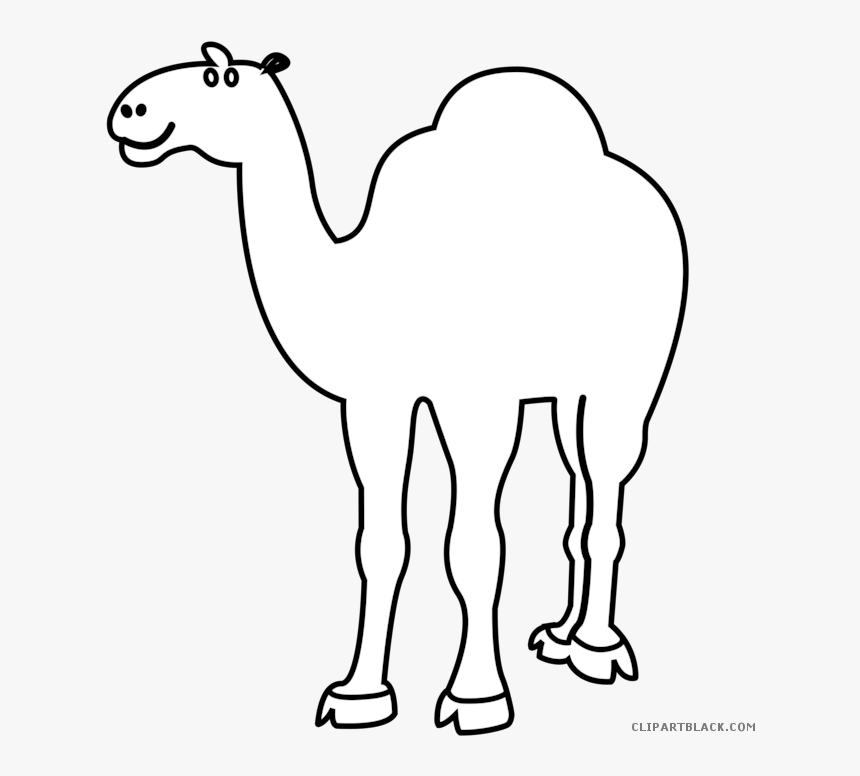

In [16]:
words = ["how","Are","You","Doing"]
sentence = ''.join(words)
print(sentence)

howAreYouDoing


In [17]:
sequence = ('학교', '종이', '땡땡')

In [18]:
name = " ".join(sequence)
name

'학교 종이 땡땡'

In [19]:
name = '우리는 좋은 사람들이 되고 싶어요 좋은 사람들이 되고 싶어요'
words = name.split()
print(words)

['우리는', '좋은', '사람들이', '되고', '싶어요', '좋은', '사람들이', '되고', '싶어요']


In [20]:
name = '우리는 좋은 사람들이 되고 싶어요 좋은 사람들이 되고 싶어요'
words = name.split('좋은')
print(words)


['우리는 ', ' 사람들이 되고 싶어요 ', ' 사람들이 되고 싶어요']


In [21]:
print(len(words)) # 단어수
print(len(name))  # 글자수

3
33


In [22]:
word = "Easy"
x = list(word)
print(x)

['E', 'a', 's', 'y']


In [23]:
x[3]  # index

'y'

### Random

In [24]:
import random

# Create a random floating point number and print it.
print(random.random()) # 랜덤이라는 라이브러리에서, 랜덤이라는 함수를 불러(call)


# pick a random whole number between 0 and 10.
print(random.randrange(0,4)) # 제비뽑기 용도

# pick a random floating point number between 0 and 10.
print(random.uniform(0,10))

0.4940100687711598
0
8.390646090689259


In [25]:
# df.sample(5)  # 어떤 테이블에서 5줄을 무작위로 뽑기 샘플링

### Keyboard Input

In [26]:
# 지시사항 없이 바로 입력 받기

input() 
# 입력받은 결과는 문자 형식 (형식에 제한 없기 때문)

1


'1'

In [27]:
input() * 3  # 입력받는 것은 문자로 치기 때문에, 뒤에 곱하기 3을 세번써라로 인식한다

1


'111'

In [28]:
name = input('What is your name? ')
print(' >> Hello ' + name)

job = input('What is your job? ')
print(' >> Your job is ' + job)

num = input('Give me a number? ')
print(' >> You said: ' + str(num))

What is your name? 1
 >> Hello 1
What is your job? 1
 >> Your job is 1
Give me a number? 1
 >> You said: 1


In [29]:
# if 조건문 (조건을 충족하는지 비교) 사용

color = 'orange'

# 두 값이 같은지를 비교하는 연산자 operator로 == 사용
if color=='black':
    print('color')

print('색상이 검정인지 확인 완료')    


색상이 검정인지 확인 완료


In [30]:
color = 'grey'

if color=='darkgrey': # 땡땡 꼭 필요 (문법임. 약속!!)
    print('color')
else:
    print('color is not darkgrey')


color is not darkgrey


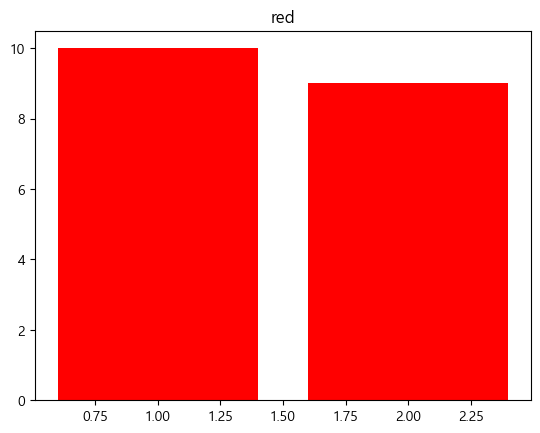

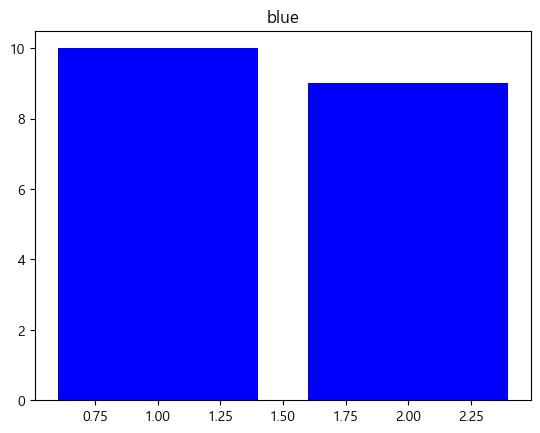

In [31]:
# 반복문 loop 안에서 조건문 if 사용

# 반복문이 사용할 색상리스트 지정
colorList = ['red', 'green', 'blue']

# 색상리스트 요소들 각각에 대해 실행
for x in colorList:
    # 지정한 색상이 아니면 실행
    if x!='green':
        plt.bar([1,2], [10,9], color=x)
        plt.title(x)
        plt.show()

## 데이터프레임 형태의 데이터 가공

### 데이터 불러오기 - 판매데이터

In [32]:
# 판매내역 테이블 불러오기
sales = pd.read_csv(dataPath + 'brk_salesmast01.csv', encoding='euc-kr')
sales = sales.drop(sales.columns[0], axis=1)

# 상품 테이블 불러오기
itemmast = pd.read_csv(dataPath + 'brk_itemmast01.csv', encoding='euc-kr')
itemmast = itemmast.drop(itemmast.columns[0], axis=1)

# 고객 테이블 불러오기
custmast = pd.read_csv(dataPath + 'brk_custmast01.csv', encoding='euc-kr')
custmast = custmast.drop(custmast.columns[0], axis=1)



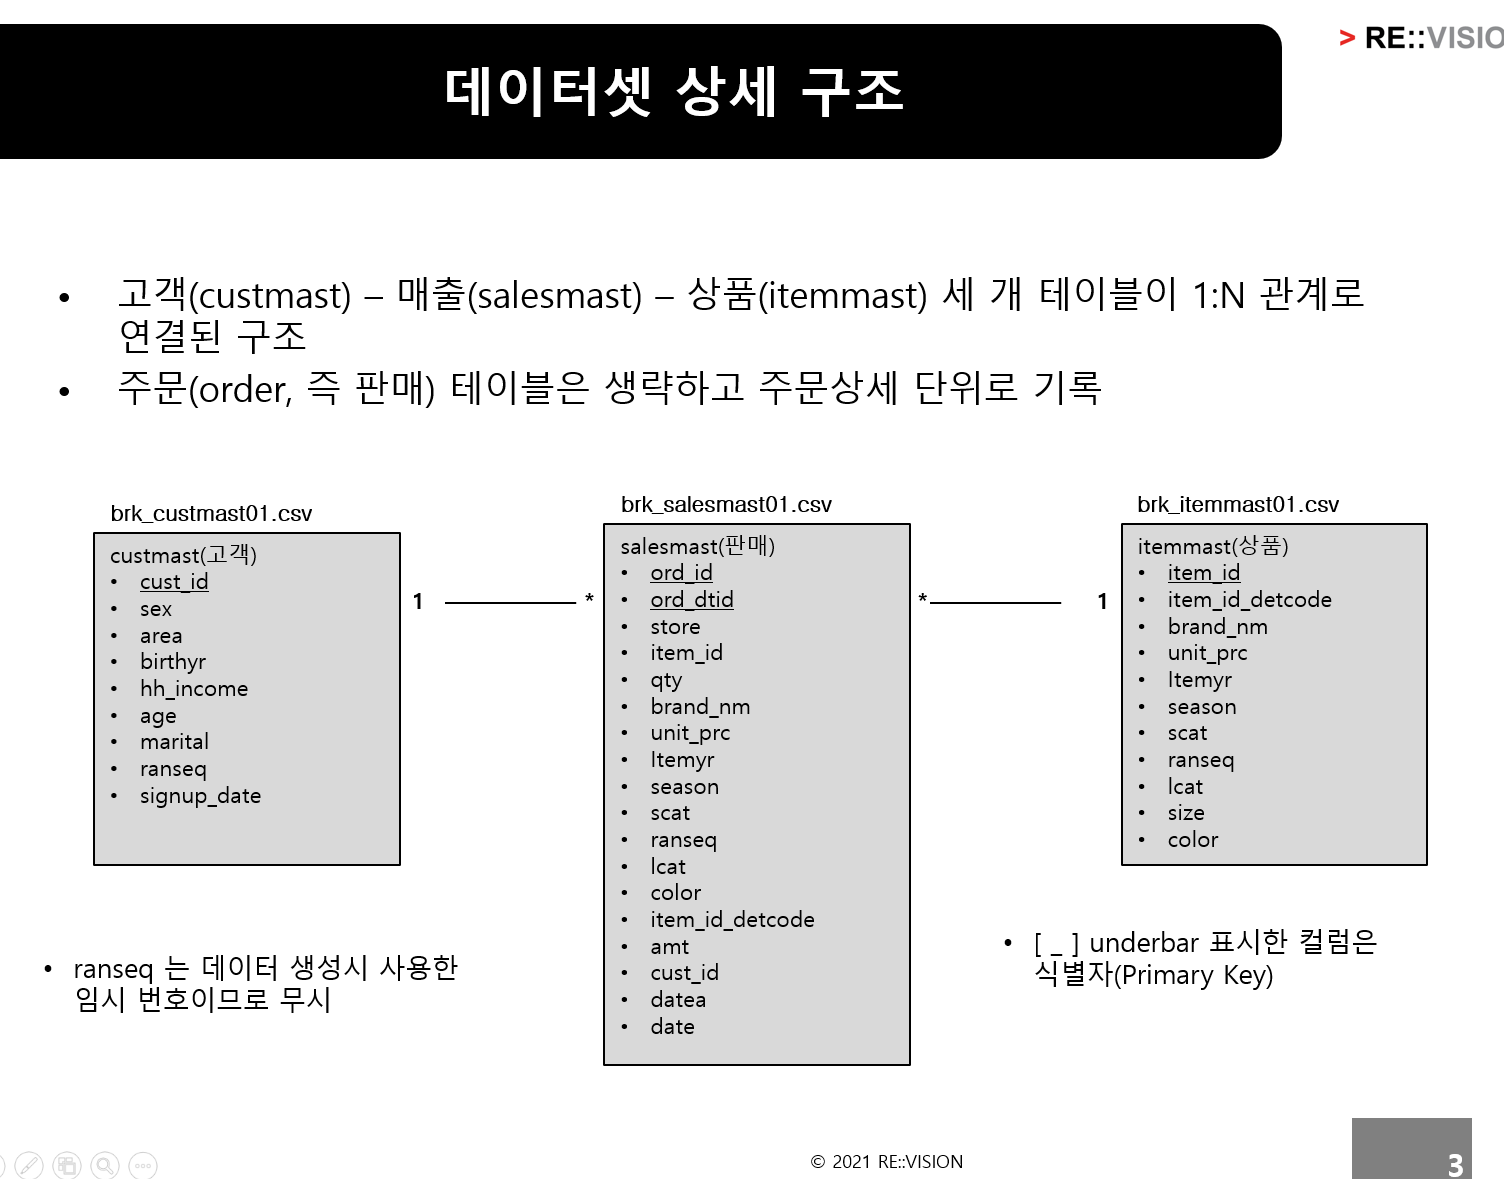

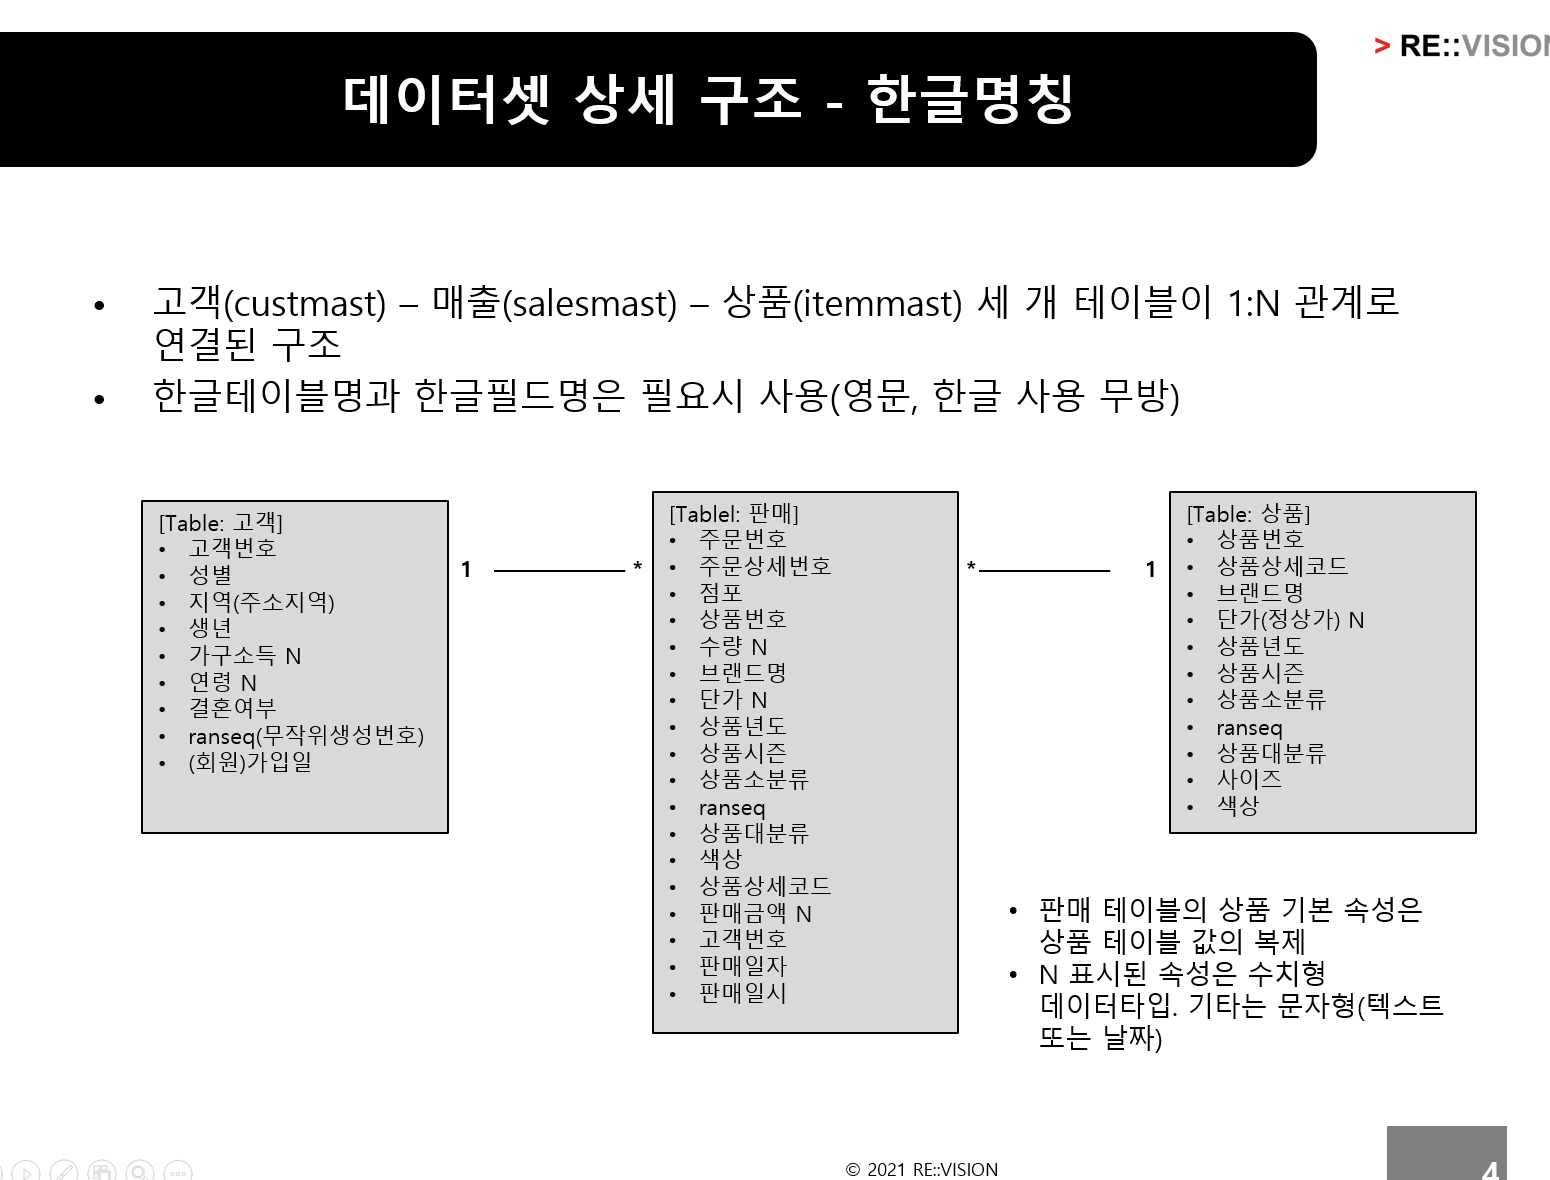

In [33]:
# 상품 테이블 보기

print(itemmast.shape) #  가로 세로 크기 == 모양 = 행의 수와 열의 수
itemmast.sample(5) # 무작위로 테이블(dataframe)의 5개 행만 뽑아서 화면 출력

(958, 11)


,item_id,brand_nm,unit_prc,itemyr,season,scat,ranseq,lcat,size,color,item_id_detcode
500,SH1004108,Shoote,70000,2019,FW,바지,56,여성캐주얼,88,black,108
648,ES2003208,Esteeme,65000,2020,AS,셔츠,28,여성캐주얼,100,blue,108
484,SH1004001,Shoote,145000,2019,SS,바지,104,여성캐주얼,66,grey,101
740,ES2004503,Esteeme,90000,2020,SS,셔츠,61,여성캐주얼,90,pink,103
218,SH1002201,Shoote,180000,2018,AS,재킷,113,남성캐주얼,85,grey,101


In [34]:
itemmast #  

# 일부만 추출하려면 .head(3), .tail(4)
# 또는 무작위로 일정 갯수 
n= 3
itemmast.sample(n) # e.g. sample(4)

,item_id,brand_nm,unit_prc,itemyr,season,scat,ranseq,lcat,size,color,item_id_detcode
9,ES2000604,Esteeme,90000,2018,FW,바지,60,여성캐주얼,77,grey,104
519,SH1004309,Shoote,60000,2019,AS,셔츠,10,여성캐주얼,100,pink,109
15,ES2000701,Esteeme,100000,2018,SS,바지,63,여성캐주얼,66,grey,101


In [35]:
# 판매 테이블 보기

print(sales.shape)
sales.sample(5)

(41936, 19)


,ord_id,ord_dtid,store,item_id,qty,brand_nm,unit_prc,itemyr,season,scat,ranseq,lcat,size,color,item_id_detcode,amt,cust_id,datea,date
31003,300387384,1,Shoote city,SH1008306,1,Shoote,70000,2020,FW,바지,35,남성캐주얼,90,navy,106,70000,B100030946,2020-11-12,2020-11-12 18:27:56.346574
26672,300327672,1,ONL,SH1000806,1,Shoote,100000,2018,FW,바지,71,남성캐주얼,90,navy,106,100000,B100099566,2019-11-05,2019-11-05 15:14:01.472171
19164,300229275,1,ONL,SH1005004,1,Shoote,70000,2019,SS,바지,44,여성캐주얼,77,grey,104,70000,B100049715,2019-10-05,2019-10-05 17:21:02.231659
10426,300123672,1,Multi bupyong,SH1004007,1,Shoote,145000,2019,SS,바지,104,여성캐주얼,88,grey,107,145000,NaN,2019-05-31,2019-05-31 18:22:22.771284
36494,300489699,1,ONL,SH1004206,2,Shoote,35000,2019,SS,셔츠,1,여성캐주얼,95,pink,106,70000,B100062094,2020-05-20,2020-05-20 10:41:30.032675


In [36]:
# 판매 테이블 컬럼명 확인

sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41936 entries, 0 to 41935
Data columns (total 19 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   ord_id           41936 non-null  int64 
 1   ord_dtid         41936 non-null  int64 
 2   store            41936 non-null  object
 3   item_id          41936 non-null  object
 4   qty              41936 non-null  int64 
 5   brand_nm         41936 non-null  object
 6   unit_prc         41936 non-null  int64 
 7   itemyr           41936 non-null  int64 
 8   season           41936 non-null  object
 9   scat             41936 non-null  object
 10  ranseq           41936 non-null  int64 
 11  lcat             41936 non-null  object
 12  size             41936 non-null  int64 
 13  color            41936 non-null  object
 14  item_id_detcode  41936 non-null  int64 
 15  amt              41936 non-null  int64 
 16  cust_id          28586 non-null  object
 17  datea            41936 non-null

In [37]:
#  컬럼명만 보기

np.array(sales.columns)

array(['ord_id', 'ord_dtid', 'store', 'item_id', 'qty', 'brand_nm',
       'unit_prc', 'itemyr', 'season', 'scat', 'ranseq', 'lcat', 'size',
       'color', 'item_id_detcode', 'amt', 'cust_id', 'datea', 'date'],
      dtype=object)

In [38]:
#  컬럼명만 보기

sales.columns

Index(['ord_id', 'ord_dtid', 'store', 'item_id', 'qty', 'brand_nm', 'unit_prc',
       'itemyr', 'season', 'scat', 'ranseq', 'lcat', 'size', 'color',
       'item_id_detcode', 'amt', 'cust_id', 'datea', 'date'],
      dtype='object')

In [39]:
# 고객 테이블 데이터 확인

print(custmast.shape) # 행과 열의 순서 --> 행렬 (RC == row and column)
custmast.sample(5)

(26000, 9)


,cust_id,sex,area,birthyr,hh_income,age,marital,ranseq,signup_date
1088,B100063147,F,seoul,1997,51000,24,미혼,1088,2018-11-26 11:11:27.243860
16233,B100080091,F,inchon,1982,23000,39,기혼,16233,2019-04-18 11:11:27.243860
13605,B100009219,M,seoul,1969,53000,52,기혼,13605,2018-08-19 11:11:27.243860
6297,B100098517,F,inchon,1980,68000,41,기혼,6297,2017-12-18 11:11:27.243860
638,B100056010,M,gyunggi,1958,25000,63,기혼,638,2018-06-27 11:11:27.243860


## 상품군별 매출 시각화 응용
- 각 상품과 상품군별로 매출이 어떠했는가에 대한 집계데이터를 만든 후
- 집계된 데이터 (dataframe 테이블)을 챠트로 시각적으로 나타냄 (visualization)


### 상품구성 확인

In [40]:
# 상품의 수 확인
# 등록된 상품은 몇개인가?

len(itemmast.item_id), len(itemmast.item_id.unique()) 


(958, 958)

- unique() 함수 사용은 혹시라도 **중복해서 등록되어있는 상품** 이 있는 것은 아닌가 확인을 위해 추가해 본 것
- unique() 함수가 있든 없든 같은 수가 나온다면 상품 테이블에 중복된 행은 없다는 의미(상품코드)

In [41]:
# item_id 로 정렬 (알파벳순) 한 후 맨 앞부터 10개 행을 조회

itemmast[['item_id']].drop_duplicates().sort_values(['item_id']).head(10)

# itemmast가 테이블인데 거기서 컬럼 하나를 가져옵니다
# 컬럼 하나만 가져오면 값만 보이므로
# 테이블 모양을 유지하기 위해서
# 브래킷을 두개를 겹쳐서 (브래킷 안에 브래킷이 있는 구조로)
# 쓰기도 한다

# drop_duplicates() # pandas에서 중복제거하는 명령
# sort_values() # 값을 정렬하는 명령. 기준이되는 컬럼을 지정해준다


,item_id
0,ES2000501
1,ES2000502
2,ES2000503
3,ES2000504
4,ES2000505
5,ES2000506
6,ES2000601
7,ES2000602
8,ES2000603
9,ES2000604


In [42]:
# head() 에 인수(parameter) 를 지정하지 않으면 5개 행 조회

itemmast[['item_id']].drop_duplicates().sort_values(['item_id']).head()

,item_id
0,ES2000501
1,ES2000502
2,ES2000503
3,ES2000504
4,ES2000505


In [43]:
# tail() 은 가장 마지막 5개 행을 조회 (subset)

itemmast[['item_id']].drop_duplicates().sort_values(['item_id']).tail()

,item_id
953,SH1009002
954,SH1009003
955,SH1009004
956,SH1009005
957,SH1009006


In [44]:
# 브랜드 목록 보기

itemmast.brand_nm.unique()

array(['Esteeme', 'Shoote'], dtype=object)

- 가상의 패션기업 <㈜브루클린>은 <슈떼 Shoote>와 <에스뗌므 Esteeme> 두 개 브랜드를 운영
- 슈떼는 전령대 대상 유니섹스 캐주얼 브랜드
- 에스뗌므는 3년전 런칭한 여성 세미 정장 스타일의 브랜드

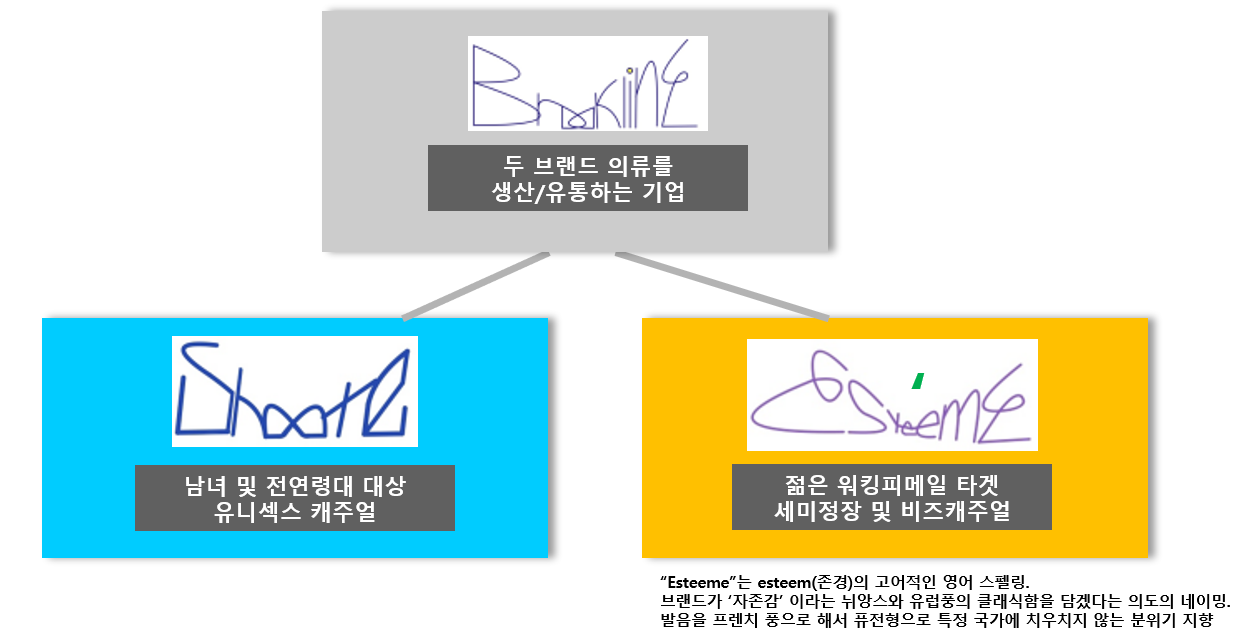

In [45]:
# 브랜드별 상품 건수 -- 상품마스터 등록 기준

itemmast.brand_nm.value_counts()
# itemmast.brand_nm

Shoote     621
Esteeme    337
Name: brand_nm, dtype: int64

- value_counts() 함수는 지정한 컬럼에 들어있는 값들이 해당 테이블에서 **몇 번씩 등장하는가**를 집계해서 보여 줌

In [46]:
# 브랜드별 대분류 목록 보기

itemmast[['brand_nm', 'lcat']].drop_duplicates() # 중복 제거

,brand_nm,lcat
0,Esteeme,여성캐주얼
84,Shoote,여성캐주얼
93,Shoote,남성캐주얼
99,Shoote,코트
719,Esteeme,코트


In [47]:
# 브랜드별 대분류 순으로 정렬

itemmast[['brand_nm', 'lcat']].drop_duplicates().sort_values(['brand_nm', 'lcat'])

,brand_nm,lcat
0,Esteeme,여성캐주얼
719,Esteeme,코트
93,Shoote,남성캐주얼
84,Shoote,여성캐주얼
99,Shoote,코트


- ['brand_nm', 'lcat'] 형식은 brand_nm 과 lcat 이라는 두 가지 요소를 가진 list
- [] 형식의 괄호는 영어로 square brackets 또는 brackets 라고 부름
- list 는 여러 개 값으로 구성된 일종의 집합<br><br>
- 정렬할 때 list를 사용한다는 것은 그 안의 값들을 모두 사용해서 정렬한다는 것
- 단, **순서 중요**함. 여기서는 brand_nm 알파벳순, 그리고 그 안에서 lcat 알파벳 순서로 정렬

In [48]:
# 브랜드 상관없이 대분류 순으로 정렬

itemmast[['brand_nm', 'lcat']].drop_duplicates().sort_values('lcat')

,brand_nm,lcat
93,Shoote,남성캐주얼
0,Esteeme,여성캐주얼
84,Shoote,여성캐주얼
99,Shoote,코트
719,Esteeme,코트


In [49]:
# 브랜드별 대분류별, 소분류 목록 보기

itemmast[['brand_nm', 'lcat','scat']].drop_duplicates() # 중복 제거

,brand_nm,lcat,scat
0,Esteeme,여성캐주얼,재킷
6,Esteeme,여성캐주얼,바지
24,Esteeme,여성캐주얼,셔츠
84,Shoote,여성캐주얼,바지
93,Shoote,남성캐주얼,바지
99,Shoote,코트,코트
103,Shoote,여성캐주얼,셔츠
127,Shoote,여성캐주얼,재킷
133,Shoote,여성캐주얼,치마
172,Shoote,남성캐주얼,셔츠


#### 상품군별 상품수 집계

In [50]:
# 브랜드별 대분류별 상품수 집계

itemmast[['brand_nm', 'lcat', 'item_id']].groupby(['brand_nm', 'lcat']).count()
# itemmast[['brand_nm', 'lcat', 'item_id']].groupby(['brand_nm', 'lcat']).count().reset_index()

# 제목없는 녀석을 인덱스 라고 부름

# itemmast[['brand_nm', 'lcat', 'item_id']].groupby(['brand_nm', 'lcat']).count().reset_index()


item_id
brand_nm lcat          
Esteeme  여성캐주얼      333
         코트           4
Shoote   남성캐주얼      142
         여성캐주얼      447
         코트          32

In [51]:
# index를 컬럼으로 변경

itemmast[['brand_nm', 'lcat', 'item_id']].groupby(['brand_nm', 'lcat']).count().reset_index()

,brand_nm,lcat,item_id
0,Esteeme,여성캐주얼,333
1,Esteeme,코트,4
2,Shoote,남성캐주얼,142
3,Shoote,여성캐주얼,447
4,Shoote,코트,32


In [52]:
# 상품수를 나타내는 컬럼명으로 변경

itemmast_agg1 = itemmast[['brand_nm', 'lcat', 'item_id']].groupby(['brand_nm', 'lcat']).count().reset_index()
print(itemmast_agg1.columns)

# 새로운 컬럼명을 가진 리스트로 컬럼명을 변경

itemmast_agg1.columns = ['brand_nm', 'lcat', 'nitem']

# 변경할 컬럼명을 지정해서 각각 변경하는 방식 사용도 가능
# itemmast_agg1 = itemmast_agg1.rename({'item_id': 'nitem'}, axis=1)

itemmast_agg1

Index(['brand_nm', 'lcat', 'item_id'], dtype='object')


,brand_nm,lcat,nitem
0,Esteeme,여성캐주얼,333
1,Esteeme,코트,4
2,Shoote,남성캐주얼,142
3,Shoote,여성캐주얼,447
4,Shoote,코트,32


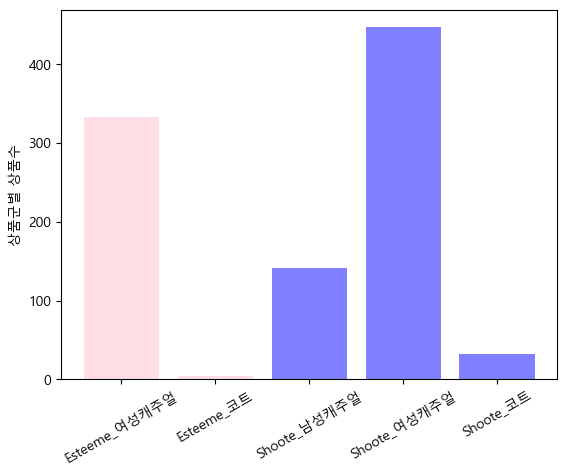

In [53]:
# 브랜드별 대분류별 상품수 챠트로 확인

# 조건에 따라 다른 색상을 지정 (색상리스트 생성)
colors1 = np.where(itemmast_agg1.brand_nm=='Esteeme','pink', 'blue')

#  브랜드명과 대분류명을 결합해 xticks X축 항목 값으로 사용
plt.bar(itemmast_agg1.brand_nm + '_' + itemmast_agg1.lcat, itemmast_agg1.nitem,
        color=colors1,
        alpha=0.5)
plt.xticks(rotation=30)
plt.ylabel('상품군별 상품수')
plt.show()

In [54]:
itemmast_agg1.brand_nm + '_' + itemmast_agg1.lcat

0    Esteeme_여성캐주얼
1       Esteeme_코트
2     Shoote_남성캐주얼
3     Shoote_여성캐주얼
4        Shoote_코트
dtype: object

In [55]:
# Esteeme 브랜드의 코트 대분류 목록만 추출해 보기 
# -- subset 부분 집합 추출 (조건에 맞는 일부 행만을 추출)

itemmast[itemmast.brand_nm=='Esteeme'] # 한 가지 조건만 적용하는 경우

,item_id,brand_nm,unit_prc,itemyr,season,scat,ranseq,lcat,size,color,item_id_detcode
0,ES2000501,Esteeme,155000,2018,AS,재킷,107,여성캐주얼,95,navy,101
1,ES2000502,Esteeme,155000,2018,AS,재킷,107,여성캐주얼,95,light grey,102
2,ES2000503,Esteeme,155000,2018,AS,재킷,107,여성캐주얼,100,navy,103
3,ES2000504,Esteeme,155000,2018,AS,재킷,107,여성캐주얼,100,light grey,104
4,ES2000505,Esteeme,155000,2018,AS,재킷,107,여성캐주얼,105,navy,105
...,...,...,...,...,...,...,...,...,...,...,...
748,ES2004602,Esteeme,135000,2020,AS,재킷,99,여성캐주얼,95,light grey,102
749,ES2004603,Esteeme,135000,2020,AS,재킷,99,여성캐주얼,100,navy,103
750,ES2004604,Esteeme,135000,2020,AS,재킷,99,여성캐주얼,100,light grey,104
751,ES2004605,Esteeme,135000,2020,AS,재킷,99,여성캐주얼,105,navy,105


- 참고 : season 컬럼의 값 중 **AS** 는 전시즌 (all season)

In [56]:
itemmast[(itemmast.brand_nm=='Esteeme') & (itemmast.lcat=='코트')]

# 두 가지 조건을 동시 적용하는 경우
# 각 조건에 괄호 () 를 주고 & (and) 또는 | (or) 로 연결

,item_id,brand_nm,unit_prc,itemyr,season,scat,ranseq,lcat,size,color,item_id_detcode
719,ES2004201,Esteeme,165000,2020,FW,코트,110,코트,90,black,101
720,ES2004202,Esteeme,165000,2020,FW,코트,110,코트,90,navy,102
721,ES2004203,Esteeme,165000,2020,FW,코트,110,코트,95,black,103
722,ES2004204,Esteeme,165000,2020,FW,코트,110,코트,95,navy,104


In [57]:
# 출시년도가 2020년인 상품만 추출

itemmast[itemmast.itemyr==2020]

,item_id,brand_nm,unit_prc,itemyr,season,scat,ranseq,lcat,size,color,item_id_detcode
641,ES2003201,Esteeme,65000,2020,AS,셔츠,28,여성캐주얼,90,white,101
642,ES2003202,Esteeme,65000,2020,AS,셔츠,28,여성캐주얼,90,blue,102
643,ES2003203,Esteeme,65000,2020,AS,셔츠,28,여성캐주얼,90,pink,103
644,ES2003204,Esteeme,65000,2020,AS,셔츠,28,여성캐주얼,95,white,104
645,ES2003205,Esteeme,65000,2020,AS,셔츠,28,여성캐주얼,95,blue,105
...,...,...,...,...,...,...,...,...,...,...,...
953,SH1009002,Shoote,60000,2020,FW,치마,9,여성캐주얼,66,black,102
954,SH1009003,Shoote,60000,2020,FW,치마,9,여성캐주얼,77,grey,103
955,SH1009004,Shoote,60000,2020,FW,치마,9,여성캐주얼,77,black,104
956,SH1009005,Shoote,60000,2020,FW,치마,9,여성캐주얼,88,grey,105


In [58]:
# 색상이 black이 아닌 상품만 추출

itemmast[itemmast.color!='black']

# itemmast[~(itemmast.color=='black')]
# ~ 표시는 부정 not 의미

,item_id,brand_nm,unit_prc,itemyr,season,scat,ranseq,lcat,size,color,item_id_detcode
0,ES2000501,Esteeme,155000,2018,AS,재킷,107,여성캐주얼,95,navy,101
1,ES2000502,Esteeme,155000,2018,AS,재킷,107,여성캐주얼,95,light grey,102
2,ES2000503,Esteeme,155000,2018,AS,재킷,107,여성캐주얼,100,navy,103
3,ES2000504,Esteeme,155000,2018,AS,재킷,107,여성캐주얼,100,light grey,104
4,ES2000505,Esteeme,155000,2018,AS,재킷,107,여성캐주얼,105,navy,105
...,...,...,...,...,...,...,...,...,...,...,...
950,SH1008905,Shoote,80000,2020,AS,셔츠,43,남성캐주얼,105,blue,105
951,SH1008906,Shoote,80000,2020,AS,셔츠,43,남성캐주얼,105,check,106
952,SH1009001,Shoote,60000,2020,FW,치마,9,여성캐주얼,66,grey,101
954,SH1009003,Shoote,60000,2020,FW,치마,9,여성캐주얼,77,grey,103


In [59]:
# 블랙이 아니거나 네이비가 아니거나 .... 추출. 몇건??? 몇줄??

itemmast[(itemmast.color!='black') & (itemmast.color!='navy')]

,item_id,brand_nm,unit_prc,itemyr,season,scat,ranseq,lcat,size,color,item_id_detcode
1,ES2000502,Esteeme,155000,2018,AS,재킷,107,여성캐주얼,95,light grey,102
3,ES2000504,Esteeme,155000,2018,AS,재킷,107,여성캐주얼,100,light grey,104
5,ES2000506,Esteeme,155000,2018,AS,재킷,107,여성캐주얼,105,light grey,106
6,ES2000601,Esteeme,90000,2018,FW,바지,60,여성캐주얼,66,grey,101
9,ES2000604,Esteeme,90000,2018,FW,바지,60,여성캐주얼,77,grey,104
...,...,...,...,...,...,...,...,...,...,...,...
950,SH1008905,Shoote,80000,2020,AS,셔츠,43,남성캐주얼,105,blue,105
951,SH1008906,Shoote,80000,2020,AS,셔츠,43,남성캐주얼,105,check,106
952,SH1009001,Shoote,60000,2020,FW,치마,9,여성캐주얼,66,grey,101
954,SH1009003,Shoote,60000,2020,FW,치마,9,여성캐주얼,77,grey,103


## 연습문제

In [60]:
# item_id에서 브랜드 코드명을 추출해 브랜드명 컬럼 생성

# item_id의 구조 확인
itemmast.sample(10).item_id

306    ES2002103
410    SH1002909
476    SH1003808
406    SH1002905
26     ES2000803
547    SH1004803
398    SH1002801
527    SH1004502
92     SH1000309
441    SH1003304
Name: item_id, dtype: object

In [61]:
itemmast.sample(5)


,item_id,brand_nm,unit_prc,itemyr,season,scat,ranseq,lcat,size,color,item_id_detcode
28,ES2000805,Esteeme,100000,2018,AS,셔츠,64,여성캐주얼,95,blue,105
762,SH1006304,Shoote,70000,2020,SS,바지,42,여성캐주얼,77,grey,104
7,ES2000602,Esteeme,90000,2018,FW,바지,60,여성캐주얼,66,black,102
719,ES2004201,Esteeme,165000,2020,FW,코트,110,코트,90,black,101
110,SH1000608,Shoote,35000,2018,FW,셔츠,7,여성캐주얼,100,blue,108


In [62]:
df_itemsTmp = itemmast.sample(5)[  ['item_id', 'season', 'scat', 'color']  ]
colList = ['item_id', 'season', 'scat', 'color']
df_itemsTmp = itemmast.sample(5)[colList]

# 만일 item에 대해서 모든 속성이 아니라 시즌, 소분류, 색상만 포함된 테이블을 가지고 있는 경우
df_itemsTmp

,item_id,season,scat,color
585,SH1005304,FW,재킷,dark blue
49,ES2001008,FW,셔츠,blue
167,SH1001402,FW,치마,black
643,ES2003203,AS,셔츠,pink
834,SH1007206,FW,바지,navy


In [63]:
# df_itemsTmp 테이블에서 브랜드를 파악하고 싶다면?

df_itemsTmp.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5 entries, 585 to 834
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   item_id  5 non-null      object
 1   season   5 non-null      object
 2   scat     5 non-null      object
 3   color    5 non-null      object
dtypes: object(4)
memory usage: 200.0+ bytes


In [64]:
# item_id 의 첫 두글자가 브랜드를 나타내는 코드이므로

df_itemsTmp.item_id.str.slice(0,2)

585    SH
49     ES
167    SH
643    ES
834    SH
Name: item_id, dtype: object

In [65]:
# numpy array 넘파이 어레이 배열

A = [1,3,4,7,2]
print(A)

# np.array 함수를 적용하면 값이나 순서가 달라지지는 않지만 형식이 np.array로 바뀜
print(np.array(A))

[1, 3, 4, 7, 2]
[1 3 4 7 2]


In [66]:
A = [1,3,4,7,2]
print(A*2)

# np.array 함수를 적용하면 값이나 순서가 달라지지는 않지만 형식이 np.array로 바뀜
print(np.array(A)*2)

[1, 3, 4, 7, 2, 1, 3, 4, 7, 2]
[ 2  6  8 14  4]


In [67]:
# np.where 는 각 값별로 조건에 일치하는지를 확인한 후 
# 조건에 일치할 경우, 아닐 경우에 각각 지정된 값을 
# np.array 형식으로 출력

np.where(df_itemsTmp.item_id.str.slice(0,2)=='ES', 'esteeme', 'shoote')

array(['shoote', 'esteeme', 'shoote', 'esteeme', 'shoote'], dtype='<U7')

In [68]:
np.where(df_itemsTmp.item_id.str.slice(0,2)=='ES', 'esteeme', 'shoote')

array(['shoote', 'esteeme', 'shoote', 'esteeme', 'shoote'], dtype='<U7')

In [69]:
# 테이블에 item_id에서 추출한 코드를 기준으로 각 행별 브랜드명을 나타내는 값들을 컬럼으로 추가

df_itemsTmp['brand_nm'] = np.where(df_itemsTmp.item_id.str.slice(0,2)=='ES', 'esteeme', 'shoote')

df_itemsTmp

,item_id,season,scat,color,brand_nm
585,SH1005304,FW,재킷,dark blue,shoote
49,ES2001008,FW,셔츠,blue,esteeme
167,SH1001402,FW,치마,black,shoote
643,ES2003203,AS,셔츠,pink,esteeme
834,SH1007206,FW,바지,navy,shoote


In [70]:
# 색상이 grey, white, black 인 경우를 monotone 이라고 구분하는 컬럼을 추가

monoColorList = ['grey', 'white', 'black']


np.where(df_itemsTmp.color.isin(monoColorList), 'MonoTone', '기타색상' )

array(['기타색상', '기타색상', 'MonoTone', '기타색상', '기타색상'], dtype='<U8')

In [71]:
df_itemsTmp['색상분류'] = np.where(df_itemsTmp.color.isin(monoColorList), 'MonoTone', '기타색상' )

df_itemsTmp

,item_id,season,scat,color,brand_nm,색상분류
585,SH1005304,FW,재킷,dark blue,shoote,기타색상
49,ES2001008,FW,셔츠,blue,esteeme,기타색상
167,SH1001402,FW,치마,black,shoote,MonoTone
643,ES2003203,AS,셔츠,pink,esteeme,기타색상
834,SH1007206,FW,바지,navy,shoote,기타색상


In [72]:
# 계절별 색상분류별 상품수 확인

# 교차표 생성 (비교를 위한 컬럼들을 지정)
pd.crosstab(df_itemsTmp.season, df_itemsTmp.색상분류)

색상분류,MonoTone,기타색상
season,,
AS,0,1
FW,1,3


- [ 참고 ] pd.crosstab 은 행, 렬 양쪽에 각각 복수 컬럼을 지정해서 다차원 테이블 형태의 테이블 생성 가능
- [ 참고 ] 단순 count 아닌 집계도 가능하지만 여기서는 skip

In [73]:
# 연령이 100세 이상인 고객이 있는지 확인

custmast[custmast.age>=100]

,cust_id,sex,area,birthyr,hh_income,age,marital,ranseq,signup_date


In [74]:
# 연령이 65, 90, 100 이상인 고객이 있는지 기준을 변경하면서 비교

# 연령 구분 기준점 리스트 정의
ageCutoffList = [65, 80, 100]

# for 반복문 활용
for x in ageCutoffList:
    # 조건 해당 데이터 부분집합 화면 출력
    display(custmast[custmast.age>=x])
    print(x, '세 이상 고객 ', len(custmast[custmast.age>=x]), '명 존재')

,cust_id,sex,area,birthyr,hh_income,age,marital,ranseq,signup_date
3152,B100044306,F,gyunggi,1956,83000,65,기혼,3152,2017-08-16 11:11:27.243860
24152,B100001423,F,gyunggi,1955,68000,66,미혼,24152,2019-07-27 11:11:27.243860
25151,B100068961,F,gyunggi,1955,51000,66,기혼,25151,2019-08-21 11:11:27.243860
25335,B100043700,F,gyunggi,1954,23000,67,미혼,25335,2018-09-24 11:11:27.243860


65 세 이상 고객  4 명 존재


,cust_id,sex,area,birthyr,hh_income,age,marital,ranseq,signup_date


80 세 이상 고객  0 명 존재


,cust_id,sex,area,birthyr,hh_income,age,marital,ranseq,signup_date


100 세 이상 고객  0 명 존재


In [75]:
# 단순히 가장 큰 값을 파악하는 것으로 충분하다면?

custmast.age.max()

67

[mini 연습문제] 
고객별로 회원가입시점에서의 연령을 계산하라
<br><br>
**hint ::** 회원가입시점에서 연도 해당하는 문자열만 추출해 출생년도와 비교


In [76]:
custmast 
# 1. 새로운 컬럼(이름 : signup_yr)을 추가하는데 signup_date 의 앞 네자리만 잘라서 넣음
# 2. diffYr = signup_yr - birthyr

2018년에 가입한 고객이 1997년생이면 몇살때 가입한 것인가?

,cust_id,sex,area,birthyr,hh_income,age,marital,ranseq,signup_date
0,B100047771,F,inchon,1997,43000,24,미혼,0,2018-02-17 11:11:27.243860
1,B100060077,F,seoul,1996,26000,25,미혼,1,2018-05-14 11:11:27.243860
2,B100048415,F,seoul,1991,41000,30,미혼,2,2016-09-30 11:11:27.243860
3,B100023217,M,gyunggi,1981,50000,40,기혼,3,2016-05-30 11:11:27.243860
4,B100057806,F,gyunggi,1990,68000,31,미혼,4,2017-04-08 11:11:27.243860
...,...,...,...,...,...,...,...,...,...
25995,B100041983,M,gangwon,1983,53000,38,기혼,25995,2018-04-06 11:11:27.243860
25996,B100012073,F,seoul,1991,21000,30,미혼,25996,2019-11-03 11:11:27.243860
25997,B100061748,M,gangwon,1965,70000,56,기혼,25997,2017-03-30 11:11:27.243860
25998,B100058859,M,seoul,1984,78000,37,기혼,25998,2016-06-11 11:11:27.243860


In [77]:
custmast0001 = custmast.copy()
# 1. 새로운 컬럼(이름 : signup_yr)을 추가하는데 signup_date 의 앞 네자리만 잘라서 넣음
custmast0001['signup_yr'] = custmast0001.signup_date.str.slice(0,4)
# 빼기
custmast0001['sigup_birth_yr_diff'] = custmast0001.signup_yr.astype(int) - custmast0001.birthyr +1
#  .astype(int) 이부분은 .astype() 은 형식을 변경하는 명령
# 괄호안의 int 는 integer 정수
# 그래서 여기 명령은 합쳐보면 .......... (문자 object 또는 string) 형식을 정수로 바꾸라는 뜻

# 그러면 숫자를 문자로 바꾸고 싶다 그때는 뭐??
# 답 : .astype(str)  # string 문자열 형식으로 바꾼다

# custmast0001.signup_yr.astype(int) -custmast0001.birthyr + 1
custmast0001

,cust_id,sex,area,birthyr,hh_income,age,marital,ranseq,signup_date,signup_yr,sigup_birth_yr_diff
0,B100047771,F,inchon,1997,43000,24,미혼,0,2018-02-17 11:11:27.243860,2018,22
1,B100060077,F,seoul,1996,26000,25,미혼,1,2018-05-14 11:11:27.243860,2018,23
2,B100048415,F,seoul,1991,41000,30,미혼,2,2016-09-30 11:11:27.243860,2016,26
3,B100023217,M,gyunggi,1981,50000,40,기혼,3,2016-05-30 11:11:27.243860,2016,36
4,B100057806,F,gyunggi,1990,68000,31,미혼,4,2017-04-08 11:11:27.243860,2017,28
...,...,...,...,...,...,...,...,...,...,...,...
25995,B100041983,M,gangwon,1983,53000,38,기혼,25995,2018-04-06 11:11:27.243860,2018,36
25996,B100012073,F,seoul,1991,21000,30,미혼,25996,2019-11-03 11:11:27.243860,2019,29
25997,B100061748,M,gangwon,1965,70000,56,기혼,25997,2017-03-30 11:11:27.243860,2017,53
25998,B100058859,M,seoul,1984,78000,37,기혼,25998,2016-06-11 11:11:27.243860,2016,33


- ESC + B 하면... 아래에 셀하나 빈거 추가 단축키
- ESC + M 치면 ... 그 셀이 코드 셀이 아니라 <span style="color:dodgerblue">마크다운 markdown</span> 으로 바뀜

# 배운 것이 무엇인지 보기 : 라이브 코딩 

In [110]:
# 고객테이블만 가지고 배운 걸 활용하는 연습

# 먼저 몇명인지 보자

len(custmast0001.cust_id.unique())

26000

In [111]:
# 사람이 많아. 다 볼수는 없으니 10명만 보자

custmast0001.sample(10)

,cust_id,sex,area,birthyr,hh_income,age,marital,ranseq,signup_date,signup_yr,sigup_birth_yr_diff
25539,B100003788,F,gyunggi,1997,83000,24,미혼,25539,2018-01-29 11:11:27.243860,2018,22
1004,B100023286,M,inchon,1992,50000,29,기혼,1004,2018-02-21 11:11:27.243860,2018,27
25230,B100000247,F,gyunggi,1990,38000,31,미혼,25230,2016-04-09 11:11:27.243860,2016,27
14692,B100077955,F,inchon,1994,51000,27,미혼,14692,2016-11-11 11:11:27.243860,2016,23
4584,B100003279,M,inchon,1988,55000,33,기혼,4584,2017-03-15 11:11:27.243860,2017,30
17816,B100010658,F,seoul,1976,51000,45,기혼,17816,2020-04-22 11:11:27.243860,2020,45
5581,B100005091,M,inchon,1992,40000,29,미혼,5581,2019-06-27 11:11:27.243860,2019,28
6705,B100055803,F,seoul,1972,86000,49,기혼,6705,2019-03-08 11:11:27.243860,2019,48
14524,B100052492,M,gyunggi,1989,20000,32,미혼,14524,2019-07-09 11:11:27.243860,2019,31
7743,B100090154,F,gangwon,1991,46000,30,미혼,7743,2016-11-07 11:11:27.243860,2016,26


In [116]:
# 10명도 많음. 그리고 컬럼이 많아 머리가 복잡해
# 10명만 복사 떠서
# 그중에서도 성별, 연령, 지역 세개만 남기고 싶어

c0001tmp = custmast0001.sample(10)

# 그래도 고객번호는 필요해 ... 누군지 구별이 되려면

feats = ['cust_id', 'sex', 'age', 'area'] # 항목들을 먼저 지정해 놓고

c0001tmp[feats] # 지정한 항목만 남길려함

,cust_id,sex,age,area
19801,B100062152,M,50,seoul
18451,B100021813,M,57,gyunggi
9602,B100041997,F,40,gyunggi
6331,B100060040,F,34,seoul
19927,B100060920,M,31,seoul
10328,B100075363,M,41,gyunggi
16129,B100019582,M,52,seoul
9967,B100017072,F,29,seoul
16766,B100030726,F,44,gangwon
21005,B100038139,M,30,inchon


음 .... 제법 단순해졌군. 마음이 편해졌어!

In [172]:
# 이젠 분석을 해야겠어. 모델링, 머신러닝 아직 안배웠으니
# plt로 챠트나 하나 그려보자고



In [119]:
dfmyheart = c0001tmp[feats]
dfmyheart.head(3)

,cust_id,sex,age,area
19801,B100062152,M,50,seoul
18451,B100021813,M,57,gyunggi
9602,B100041997,F,40,gyunggi


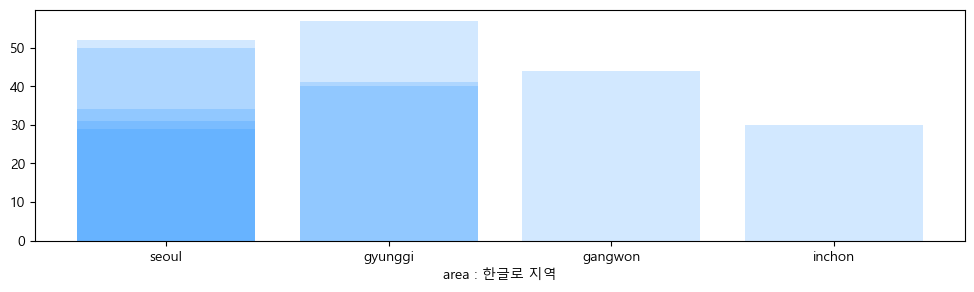

In [127]:
# 여기도 시각화 그냥 따라쳐보자고 ... 우선은 대충 시도
plt.figure(figsize=(12,3))
plt.bar(dfmyheart.area, dfmyheart.age, color='dodgerblue', alpha=0.2)
plt.xlabel('area : 한글로 지역')
plt.show()

### 막대그래프가 알고보니 파이썬 plt에서는 이상한 기능이 있음. 분포도 보여줄수가 있어!!

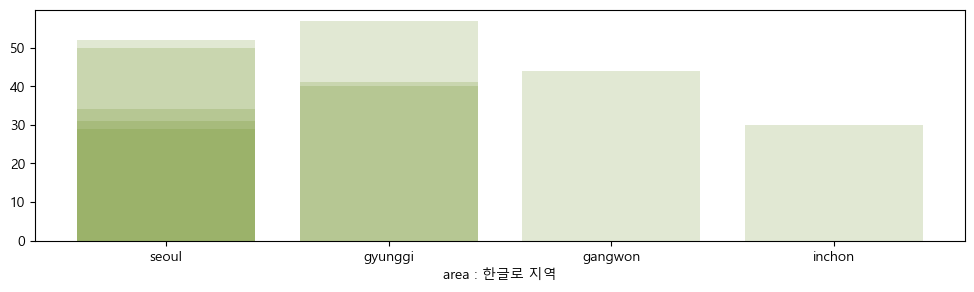

In [128]:
# olivedrab  .... gpt가 추천해준 색으로 바꿔 본다
plt.figure(figsize=(12,3))
plt.bar(dfmyheart.area, dfmyheart.age, color='olivedrab', alpha=0.2)
plt.xlabel('area : 한글로 지역')
plt.show()

In [130]:
# 일단 그림이 나와서 흡족해. 그런데 ... 너무 쉬운거라 조금 더 진도를 나가고 싶어

# 이번엔 집계를 좀 해보자
# 우선 그 중에 쉬운 것. 지역별 연령 평균을 구해보자

dfmyheart.mean() # 전체평균 말고 

age    40.8
dtype: float64

In [136]:
# 평균은 average  그런데 여기서는 주로 mean 이라 하더라

dfagemean_area = dfmyheart[['area', 'age']].groupby('area').mean().reset_index()  
dfagemean_area

,area,age
0,gangwon,44.0
1,gyunggi,46.0
2,inchon,30.0
3,seoul,39.2


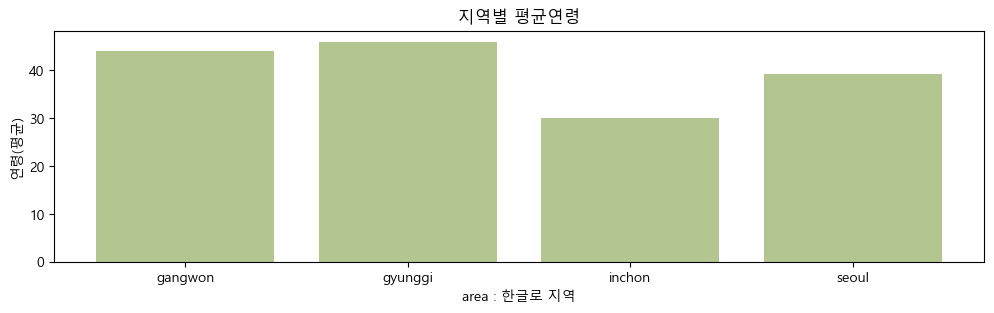

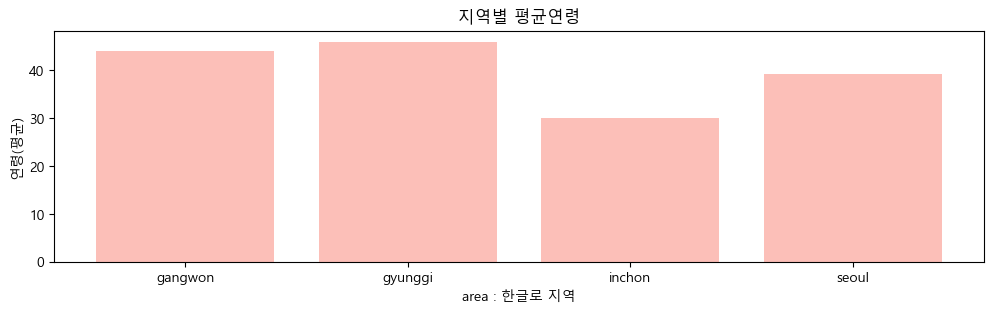

In [141]:
# 음 ... 집계 성공. 그러나 난 꼭 챠트를 보고 싶어. olivedrab 으로 칠하려고



# olivedrab  .... gpt가 추천해준 색으로 바꿔 본다
plt.figure(figsize=(12,3))
plt.bar(dfagemean_area.area, dfagemean_area.age, color='olivedrab', alpha=0.5)
plt.xlabel('area : 한글로 지역')
plt.title('지역별 평균연령')
plt.ylabel('연령(평균)')
plt.show()

# salmon도 추천했으니 테스트
plt.figure(figsize=(12,3))
plt.bar(dfagemean_area.area, dfagemean_area.age, color='salmon', alpha=0.5)
plt.xlabel('area : 한글로 지역')
plt.title('지역별 평균연령')
plt.ylabel('연령(평균)')
plt.show()

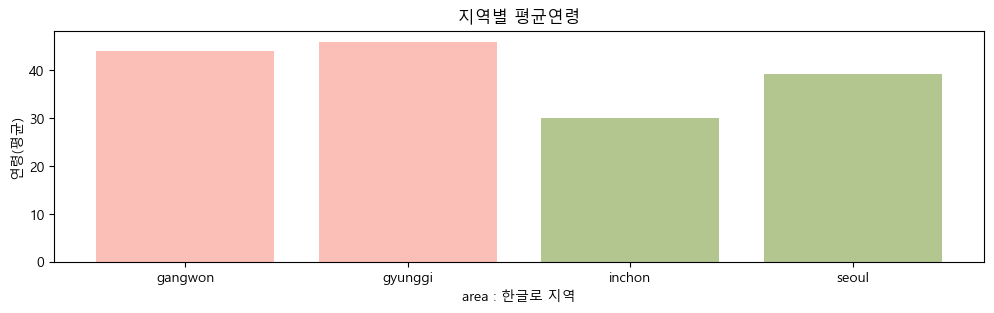

In [142]:
#  두색 다 마음에 들어서 한장에 다 넣고 싶어

# salmon도 추천했으니 테스트
colors1 = np.where(dfagemean_area.age>dfagemean_area.age.mean() ,'salmon', 'olivedrab') # 조건 지정할때 np.where
plt.figure(figsize=(12,3))
plt.bar(dfagemean_area.area, dfagemean_area.age, color=colors1 , alpha=0.5)
plt.xlabel('area : 한글로 지역')
plt.title('지역별 평균연령')
plt.ylabel('연령(평균)')
plt.show()

## 음 먼가 되는거 같으니 이제 참고 공부를 더 한다. 라이브 일단 중단

In [144]:
# sales의 주요 항목들 (판매내역)

sales[['date','unit_prc', 'qty', 'amt', 'store']].sample(5)

,date,unit_prc,qty,amt,store
19491,2019-07-12 17:49:36.817607,35000,1,35000,Multi bupyong
37876,2020-06-23 16:41:30.431579,80000,1,80000,Shoote gasan
8578,2020-03-01 15:45:52.357169,70000,1,70000,Shoote city
40932,2020-12-08 16:13:09.904704,35000,2,70000,Shoote gasan
34251,2020-03-27 14:52:30.644069,100000,1,100000,Shoote gasan


In [145]:
# 각 건에서 수량의 분포 집계 ==> 목적: 데이터 상태파악 (진단)

sales.qty.value_counts()

 1    31888
 2     9358
 3      432
-1      162
 4       77
-2       17
 0        2
Name: qty, dtype: int64

<Axes: >

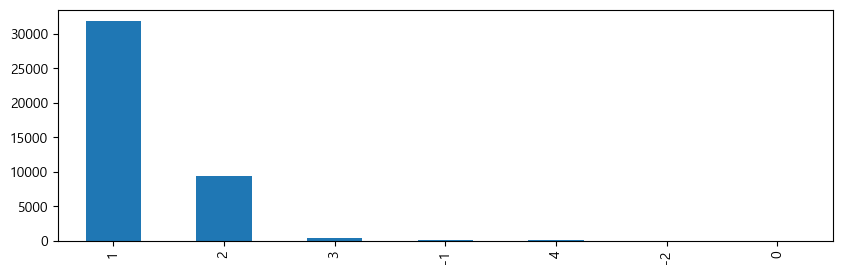

In [148]:
# 각 건에서 수량의 분포 집계 ==> 목적: 데이터 상태파악 (진단)

plt.figure(figsize=(10,3))
sales.qty.value_counts().plot(kind='bar')

In [149]:
# 인덱스를 컬럼으로 변경하고 전체를 데이터프레임 형식으로 변환해 표시

pd.DataFrame(sales.qty.value_counts().reset_index())

,index,qty
0,1,31888
1,2,9358
2,3,432
3,-1,162
4,4,77
5,-2,17
6,0,2


<Axes: >

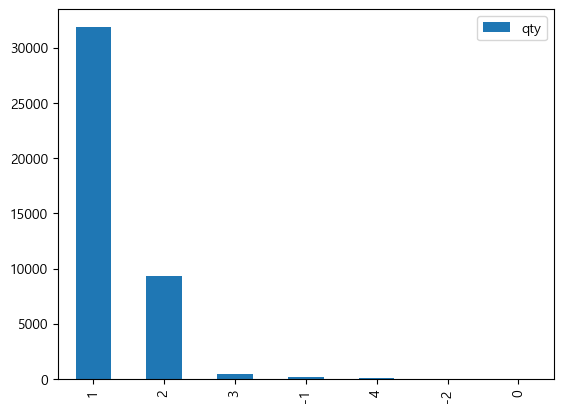

In [150]:
# 분포 챠트 생성

pd.DataFrame(sales.qty.value_counts()).plot(kind='bar')

,qty
1,31888
2,9358
3,432
-1,162
4,77
-2,17
0,2


<Axes: >

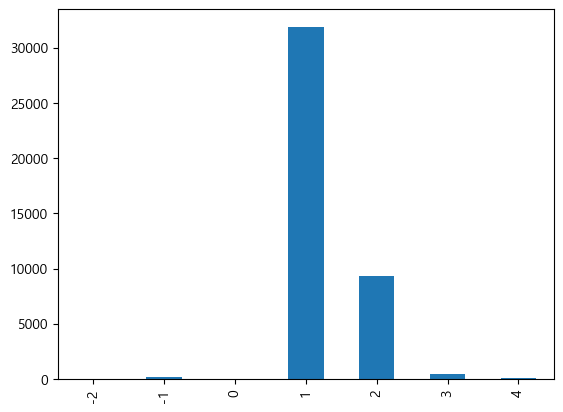

In [82]:
# 수량은 index에 들어있고 정렬은 qty 순서임
display(pd.DataFrame(sales.qty.value_counts()))

# 수량 순서로 정렬한 후 시각화
pd.DataFrame(sales.qty.value_counts()).sort_index().qty.plot(kind='bar')

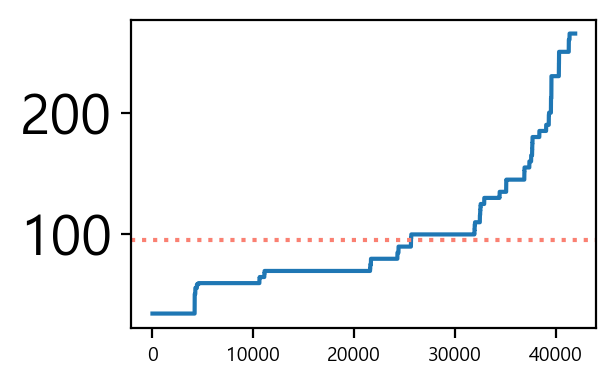

In [165]:
# 단가 구간별 판매수량 합계 산출 (2020년)

# 먼저 단가 구간을 결정하는 것이 필요하므로
# 단가의 분포를 확인
plt.figure(figsize=(3,2), dpi=200)
plt.plot(np.sort(sales.unit_prc)/1000)
plt.axhline(sales.unit_prc.mean()/1000, color='salmon', linestyle=":")
plt.xticks(size=7)
plt.yticks(size=20)
plt.show()

In [166]:
# 단가의 20%, 50%, 90% 해당 값 파악

priceCutoffList = [sales.unit_prc.quantile(0.8), sales.unit_prc.quantile(0.5), sales.unit_prc.quantile(0.1)]
priceCutoffList 

[130000.0, 70000.0, 51000.0]

In [167]:
# 한번에 세 가지 값을 얻으려면

sales.unit_prc.quantile([0.8, 0.5, 0.1])

0.8    130000.0
0.5     70000.0
0.1     51000.0
Name: unit_prc, dtype: float64

In [168]:
# 중간값은 50% 지점과 동일

sales.unit_prc.median(), sales.unit_prc.mean()

(70000.0, 95032.26344906524)

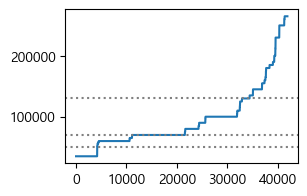

In [170]:
# 단가 구간 확인 - 시각화
plt.figure(figsize=(3,2))
plt.plot(np.sort(sales.unit_prc))

# 각 구분점을 기준으로 수평선 추가
for z in priceCutoffList:
    plt.axhline(z, color='grey', linestyle=':')

plt.show()

In [88]:
# 단가 구간별 판매수량 합계 산출 (2020년)

salestmp301 = sales[['unit_prc','qty']]

# 구분점 두 개 단위의 구간을 코드로 표시하는 컬럼 생성 (interval 형식 -- category type)
priceCutoffList1 = [salestmp301.unit_prc.min(),salestmp301.unit_prc.max()] + priceCutoffList 

# 가장 작은 값과 큰 값 사이에 구분점인 세 값이 들어있는 리스트
print(priceCutoffList1)

salestmp301['rangeGrp'] = pd.cut(salestmp301.unit_prc, np.sort(priceCutoffList1))
salestmp301

[35000, 265000, 130000.0, 70000.0, 51000.0]


,unit_prc,qty,rangeGrp
0,80000,1,"(70000.0, 130000.0]"
1,60000,2,"(51000.0, 70000.0]"
2,70000,1,"(51000.0, 70000.0]"
3,60000,1,"(51000.0, 70000.0]"
4,100000,1,"(70000.0, 130000.0]"
...,...,...,...
41931,70000,1,"(51000.0, 70000.0]"
41932,70000,1,"(51000.0, 70000.0]"
41933,100000,1,"(70000.0, 130000.0]"
41934,70000,1,"(51000.0, 70000.0]"


In [89]:
salestmp301[['rangeGrp', 'qty']].groupby('rangeGrp').sum().reset_index()

,rangeGrp,qty
0,"(35000.0, 51000.0]",82
1,"(51000.0, 70000.0]",21475
2,"(70000.0, 130000.0]",15982
3,"(130000.0, 265000.0]",9304


In [90]:
# 컬럼별 데이터 타입 확인

salestmp301[['rangeGrp', 'qty']].groupby('rangeGrp').sum().reset_index().dtypes

rangeGrp    category
qty            int64
dtype: object

In [91]:
# 구간의 기준점들을 추출해야할 필요가 있는 경우

dfQtyByRangeGrp = salestmp301[['rangeGrp', 'qty']].groupby('rangeGrp').sum().reset_index()
display(dfQtyByRangeGrp)

# .left .right 로 추출
[[i.left, i.right] for i in dfQtyByRangeGrp.rangeGrp]

,rangeGrp,qty
0,"(35000.0, 51000.0]",82
1,"(51000.0, 70000.0]",21475
2,"(70000.0, 130000.0]",15982
3,"(130000.0, 265000.0]",9304


[[35000.0, 51000.0],
 [51000.0, 70000.0],
 [70000.0, 130000.0],
 [130000.0, 265000.0]]

In [92]:
# 구간의 큰 쪽 구분점만 컬럼으로 저장 후
dfQtyByRangeGrp['grpUpper'] = [i.right for i in dfQtyByRangeGrp.rangeGrp.to_list()]
# up to 의 의미로 물결 character 추가
dfQtyByRangeGrp['grpUpper'] = '~' + dfQtyByRangeGrp['grpUpper'].astype(int).astype(str)
 
display(dfQtyByRangeGrp)

,rangeGrp,qty,grpUpper
0,"(35000.0, 51000.0]",82,~51000
1,"(51000.0, 70000.0]",21475,~70000
2,"(70000.0, 130000.0]",15982,~130000
3,"(130000.0, 265000.0]",9304,~265000


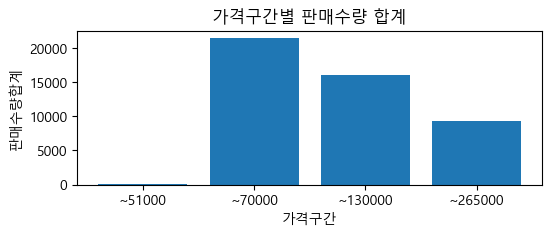

In [171]:
# 챠트 작성
plt.figure(figsize=(6,2))
plt.bar(dfQtyByRangeGrp.grpUpper, dfQtyByRangeGrp.qty)
plt.xlabel('가격구간')
plt.ylabel('판매수량합계')
plt.title('가격구간별 판매수량 합계')
plt.show()

### 병합 (merge or JOIN)

In [174]:
# merge - left, outer, right, inner 

# 7명의 임의 고객 추출
smplCusts = custmast.sample(7)[['cust_id','age','signup_date']]
print('7명 리스트')
display(smplCusts)

# 7명 중 2019 거래내역
sales19smpl = sales[(sales.cust_id.isin(smplCusts.cust_id)) & (sales.date.str.slice(0,4)=='2019')][['cust_id','ord_id', 'date', 'item_id','scat','qty']]
# 고객별 건수 집계
custSalesSum19smpl = sales19smpl[['cust_id','qty']].groupby('cust_id').count().reset_index()
print('7명 19년 거래')
display(custSalesSum19smpl)

# 7명 중 2020 거래내역
sales20smpl = sales[(sales.cust_id.isin(smplCusts.cust_id)) & (sales.date.str.slice(0,4)=='2020')][['cust_id','ord_id', 'date', 'item_id','scat','qty']]
custSalesSum20smpl = sales20smpl[['cust_id','qty']].groupby('cust_id').count().reset_index()
print('7명 20년 거래')
display(custSalesSum20smpl)

7명 리스트


,cust_id,age,signup_date
6597,B100036642,33,2016-02-04 11:11:27.243860
10897,B100055054,54,2017-06-12 11:11:27.243860
8429,B100075332,37,2017-08-12 11:11:27.243860
1140,B100031428,29,2020-07-09 11:11:27.243860
12647,B100042291,27,2016-12-02 11:11:27.243860
14900,B100066748,25,2016-11-25 11:11:27.243860
23660,B100026212,46,2018-10-08 11:11:27.243860


7명 19년 거래


,cust_id,qty
0,B100026212,1
1,B100066748,2


7명 20년 거래


,cust_id,qty
0,B100026212,1
1,B100042291,1
2,B100055054,2
3,B100066748,1
4,B100075332,1


#### pd.merge

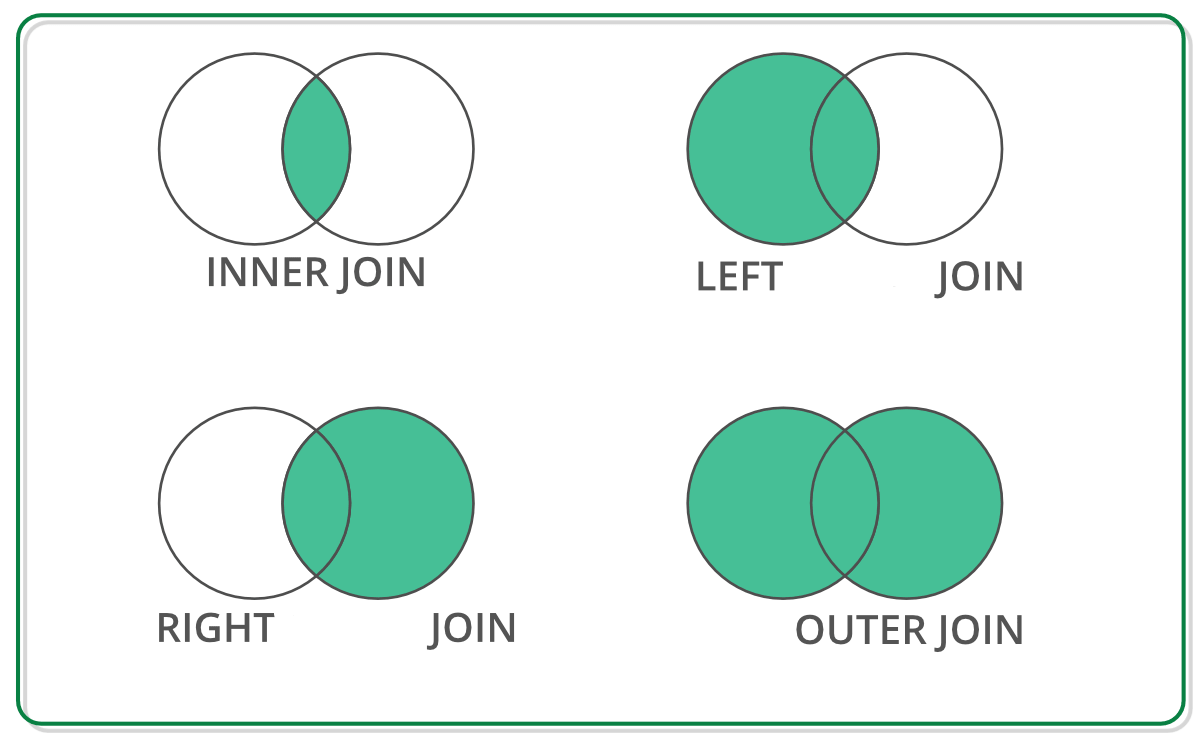

In [95]:
# left join

# 19년 거래내역 과 20년 거래내역 두 가지를 하나의 테이블로 df로 만들고 싶어

pd.merge(custSalesSum19smpl, custSalesSum20smpl, how='left', on='cust_id')

# 두 테이블을 병합했을때 a.k.a 속된말로 붙였을때 빈칸이 생기는건
# 자연스러운 현상. 대응되는 것이 없으면 당연히 빈칸이니까

# 빈칸을 그대로 둬? 아니지, 빈칸은 의미에 맞도록 바꾸는게 좋음
# 여기서는 빈칸이면?? 의미는 ..... 0이 적절함 (왜? 거래가 없었던 거니까 수량도 0이지)

# 아하!! ... 결국 LEFT JOIN이라는 것은 LEFT (즉 A)에는 빈칸이 안생긴다는 뜻??

,cust_id,qty_x,qty_y
0,B100023369,1,1.0
1,B100055927,1,NaN
2,B100087453,1,2.0


In [176]:
# _x, _y 이런식으로 자동구별로 변경된 컬럼명을 의미 있게 변경해줄 것

dfcompare1920 = pd.merge(custSalesSum19smpl, custSalesSum20smpl, how='left', on='cust_id')
dfcompare1920.columns = ['cust_id', 'qty19', 'qty20']
dfcompare1920

,cust_id,qty19,qty20
0,B100026212,1,1
1,B100066748,2,1


In [178]:
# 컬럼이 정리되었으면 연산도 가능

dfcompare1920['diffqty1920'] = dfcompare1920.qty20 - dfcompare1920.qty19 
dfcompare1920

,cust_id,qty19,qty20,diffqty1920
0,B100026212,1,1,0
1,B100066748,2,1,-1


In [96]:
# outer join
pd.merge(custSalesSum19smpl, custSalesSum20smpl, how='outer', on='cust_id')

,cust_id,qty_x,qty_y
0,B100023369,1.0,1.0
1,B100055927,1.0,NaN
2,B100087453,1.0,2.0
3,B100005096,NaN,1.0
4,B100015332,NaN,2.0


In [97]:
# left join 시 순서 중요

# 20년 데이터를 먼저 표시해 기준으로 사용하는 경우
custSalesSum20n19smpl = custSalesSum20smpl.merge(custSalesSum19smpl, how='left', on='cust_id')

# 동일한 컬럼명이 조인후 자동으로 _x, _y 로 구분 표시되므로 새로운 이름 부여
custSalesSum20n19smpl.columns = ['cust_id', 'cntTrx2020', 'cntTrx2019']

# 조인으로 발생된 빈 셀 채워주기
custSalesSum20n19smpl.fillna(0, inplace=True)  
# 어떤 테이블에 빈칸있으면 0으로 채우고(즉시 반영)

custSalesSum20n19smpl

,cust_id,cntTrx2020,cntTrx2019
0,B100005096,1,0.0
1,B100015332,2,0.0
2,B100023369,1,1.0
3,B100087453,2,1.0


[mini연습문제]

1. itemmast 에서 scat 상품분류별 상품수를 집계해 데이터프레임을 생성하라
2. itemmast 에서 scat 상품분류별 size의 중위수를 데이터프레임을 생성하라
3. 상품분류별 상품수 데이터프레임과 size 중위수 데이터프레임을 결합하여 하나의 데이터프레임을 생성하라
4. 생성된 데이터프레임의 컬럼명을 의미있는 것들로 변경하라
5. 데이터프레임을 사이즈의 중위수가 큰 순으로 정렬하라

In [183]:
# itemmast 에서 scat 상품분류별 상품수를 집계해 데이터프레임을 생성하라

itemmast.head(2)

itemmast.scat  # 상품테이블의 소분류 지정

집계: groupby().count()   # 상품수의 최대값은 얼마?
    
    

,item_id,brand_nm,unit_prc,itemyr,season,scat,ranseq,lcat,size,color,item_id_detcode
0,ES2000501,Esteeme,155000,2018,AS,재킷,107,여성캐주얼,95,navy,101
1,ES2000502,Esteeme,155000,2018,AS,재킷,107,여성캐주얼,95,light grey,102


In [188]:
itemmast[['scat', 'item_id']].groupby(['scat']).count().reset_index()

,scat,item_id
0,바지,450
1,셔츠,294
2,재킷,100
3,치마,78
4,코트,36


In [ ]:
itemmast[['brand_nm', 'lcat', 'item_id']].groupby(['brand_nm', 'lcat']).count()

In [191]:
pd.DataFrame(itemmast.scat.value_counts()).reset_index()

,index,scat
0,바지,450
1,셔츠,294
2,재킷,100
3,치마,78
4,코트,36


### 단순병합 (concat)

In [98]:
# 동일 구조일 경우 복수의 데이터프레임을 아래위로 단순 병합
# 결합에서 연결 키(key) 컬럼을 사용하지 않음

len(sales19smpl), len(pd.concat([sales19smpl, sales19smpl]))

(3, 6)

In [192]:
# 동일 구조일 경우 복수의 데이터프레임을 아래위로 단순 병합
# 결합에서 연결 키(key) 컬럼을 사용하지 않음

A = sales19smpl

# 건수보기
len(A), len(pd.concat([A,A]))



(3, 6)

In [193]:
display(A)

display(pd.concat([A,A])) # 밑에다 갖다 붙여. 단, 구조가 같아야함


,cust_id,ord_id,date,item_id,scat,qty
2676,B100066748,300033534,2019-11-07 14:54:47.446415,SH1009002,치마,2
10013,B100026212,300119352,2019-12-21 15:29:57.241802,SH1001204,셔츠,1
16489,B100066748,300196311,2019-08-26 19:28:45.895536,SH1003101,바지,1


,cust_id,ord_id,date,item_id,scat,qty
2676,B100066748,300033534,2019-11-07 14:54:47.446415,SH1009002,치마,2
10013,B100026212,300119352,2019-12-21 15:29:57.241802,SH1001204,셔츠,1
16489,B100066748,300196311,2019-08-26 19:28:45.895536,SH1003101,바지,1
2676,B100066748,300033534,2019-11-07 14:54:47.446415,SH1009002,치마,2
10013,B100026212,300119352,2019-12-21 15:29:57.241802,SH1001204,셔츠,1
16489,B100066748,300196311,2019-08-26 19:28:45.895536,SH1003101,바지,1


In [194]:
display(pd.concat([A,A,A,A]))

display(pd.concat([Aseoul,Abusan,Adaejon,Ajeju]))

,cust_id,ord_id,date,item_id,scat,qty
2676,B100066748,300033534,2019-11-07 14:54:47.446415,SH1009002,치마,2
10013,B100026212,300119352,2019-12-21 15:29:57.241802,SH1001204,셔츠,1
16489,B100066748,300196311,2019-08-26 19:28:45.895536,SH1003101,바지,1
2676,B100066748,300033534,2019-11-07 14:54:47.446415,SH1009002,치마,2
10013,B100026212,300119352,2019-12-21 15:29:57.241802,SH1001204,셔츠,1
16489,B100066748,300196311,2019-08-26 19:28:45.895536,SH1003101,바지,1
2676,B100066748,300033534,2019-11-07 14:54:47.446415,SH1009002,치마,2
10013,B100026212,300119352,2019-12-21 15:29:57.241802,SH1001204,셔츠,1
16489,B100066748,300196311,2019-08-26 19:28:45.895536,SH1003101,바지,1
2676,B100066748,300033534,2019-11-07 14:54:47.446415,SH1009002,치마,2


In [99]:
pd.concat([sales19smpl, sales20smpl])

,cust_id,ord_id,date,item_id,scat,qty
1446,B100087453,300018276,2019-08-21 15:20:17.815407,SH1000708,바지,1
4565,B100055927,300056703,2019-03-10 11:30:30.119791,SH1004305,셔츠,1
15173,B100023369,300180363,2019-08-07 12:14:19.690543,ES2002103,셔츠,2
9269,B100087453,300111246,2020-12-05 14:16:36.913451,ES2003203,셔츠,1
24210,B100015332,300297894,2020-10-23 16:56:23.845955,SH1003704,재킷,1
31454,B100023369,300395331,2020-01-26 16:19:17.229660,SH1001102,셔츠,1
32174,B100087453,300406725,2020-12-05 07:40:21.433415,SH1001901,재킷,1
38357,B100015332,300526398,2020-07-04 15:19:43.846374,SH1003503,바지,1
39079,B100005096,300541143,2020-12-19 16:40:02.422993,SH1008901,셔츠,2


In [100]:
# 좌우 방향으로 결합하는 경우

pd.concat([sales19smpl, sales20smpl], axis=1)

# 각 행의 index가 다르기 때문에 행의 수가 증가한 것 ( ==> merge를 사용하는 것이 편리하고 안전)

,cust_id,ord_id,date,item_id,scat,qty,cust_id,ord_id,date,item_id,scat,qty
1446,B100087453,300018276.0,2019-08-21 15:20:17.815407,SH1000708,바지,1.0,NaN,NaN,NaN,NaN,NaN,NaN
4565,B100055927,300056703.0,2019-03-10 11:30:30.119791,SH1004305,셔츠,1.0,NaN,NaN,NaN,NaN,NaN,NaN
15173,B100023369,300180363.0,2019-08-07 12:14:19.690543,ES2002103,셔츠,2.0,NaN,NaN,NaN,NaN,NaN,NaN
9269,NaN,NaN,NaN,NaN,NaN,NaN,B100087453,300111246.0,2020-12-05 14:16:36.913451,ES2003203,셔츠,1.0
24210,NaN,NaN,NaN,NaN,NaN,NaN,B100015332,300297894.0,2020-10-23 16:56:23.845955,SH1003704,재킷,1.0
31454,NaN,NaN,NaN,NaN,NaN,NaN,B100023369,300395331.0,2020-01-26 16:19:17.229660,SH1001102,셔츠,1.0
32174,NaN,NaN,NaN,NaN,NaN,NaN,B100087453,300406725.0,2020-12-05 07:40:21.433415,SH1001901,재킷,1.0
38357,NaN,NaN,NaN,NaN,NaN,NaN,B100015332,300526398.0,2020-07-04 15:19:43.846374,SH1003503,바지,1.0
39079,NaN,NaN,NaN,NaN,NaN,NaN,B100005096,300541143.0,2020-12-19 16:40:02.422993,SH1008901,셔츠,2.0


## DB 연결 및 SQL 사용

- DB 연결 예제<br><br>
https://www.w3schools.com/python/python_mysql_getstarted.asp
<br><br> 
- SQL을 사용한 조회 예제<br><br>
https://www.w3schools.com/python/python_mysql_select.asp    

### 기타 실전적인 데이터처리 과제들 (연습 권장)

In [101]:
# 금액이 양수가 아니면 0으로 변경



In [102]:
# 고객정보가 존재하지 않는 (고객미식별) 판매내역의 건수는? 총판매내역 건수 중 차지하는 비율은?



In [103]:
# 2019년 분기별로 각 주문건별 판매수량 합계에 차이가 있는가? 



In [104]:
# 2019년 보다 2020년 판매량이 더 많은 상품군 (대분류+소분류) Top 3는?



In [105]:
# 브랜드별로 여성고객에 한정해서 2020년 여름 보다 가을에 판매수량이 더 많았던 컬러는?



In [106]:
sales['color'].value_counts()

grey          9727
black         8773
navy          6780
white         4462
blue          4364
pink          2842
check         1576
khaki         1237
light grey    1168
dark blue     1007
Name: color, dtype: int64

## Summary

- 파이썬 프로그래밍 기본문법 - 자료유형별 간단한 처리 (strings and numbers)
- 데이터프레임(테이블)과 컬럼 처리 - 추출, 정렬, 중복제거, 병합, 데이터 변환 및 정제
<br><br>
- 파이썬 프로그래밍 문법과 pandas, numpy 데이터 처리 라이브러리들에는 무수히 다양한 기능들과 옵션들이 존재하지만 간단한 계산과 데이터프레임 가공 기능들만 익숙해지면 대부분의 데이터 가공은 가능
- **많이 사용되는 기본기능들**을 먼저 익히고 본인이 **자주 사용할 기능들을 정리**해두고 반복사용하는 것에서 출발하기 권장
- 실전 데이터 분석에서는 기존에 작성해두었던 코드를 복사해서 편집해 사용하는 경우가 많음